# Proyek Klasifikasi Gambar: Sushi
- **Nama:** Tazky Khumaira Tsany
- **Email:**   mc589d5x2489@student.devacademy.id
- **ID Dicoding:** MC589D5X2489



## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [5]:
from tensorflow.keras.layers import Rescaling

### Data Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data_path = '/content/drive/MyDrive/food baru'
img_size = (128, 128)

In [8]:
import os

total_images = 0
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Sesuaikan ekstensi file jika perlu
            total_images += 1

print(f"Total gambar dalam dataset: {total_images}")

Total gambar dalam dataset: 6022


In [9]:
# Dapatkan daftar semua file dan direktori
all_files = os.listdir(data_path)

# Cetak daftar file dan direktori
for file in all_files:
    print(file)

train
valid
test


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
model = keras.Sequential([
       keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
       # ... (lapisan-lapisan lainnya) ...
       keras.layers.Dense(1, activation='sigmoid')
   ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

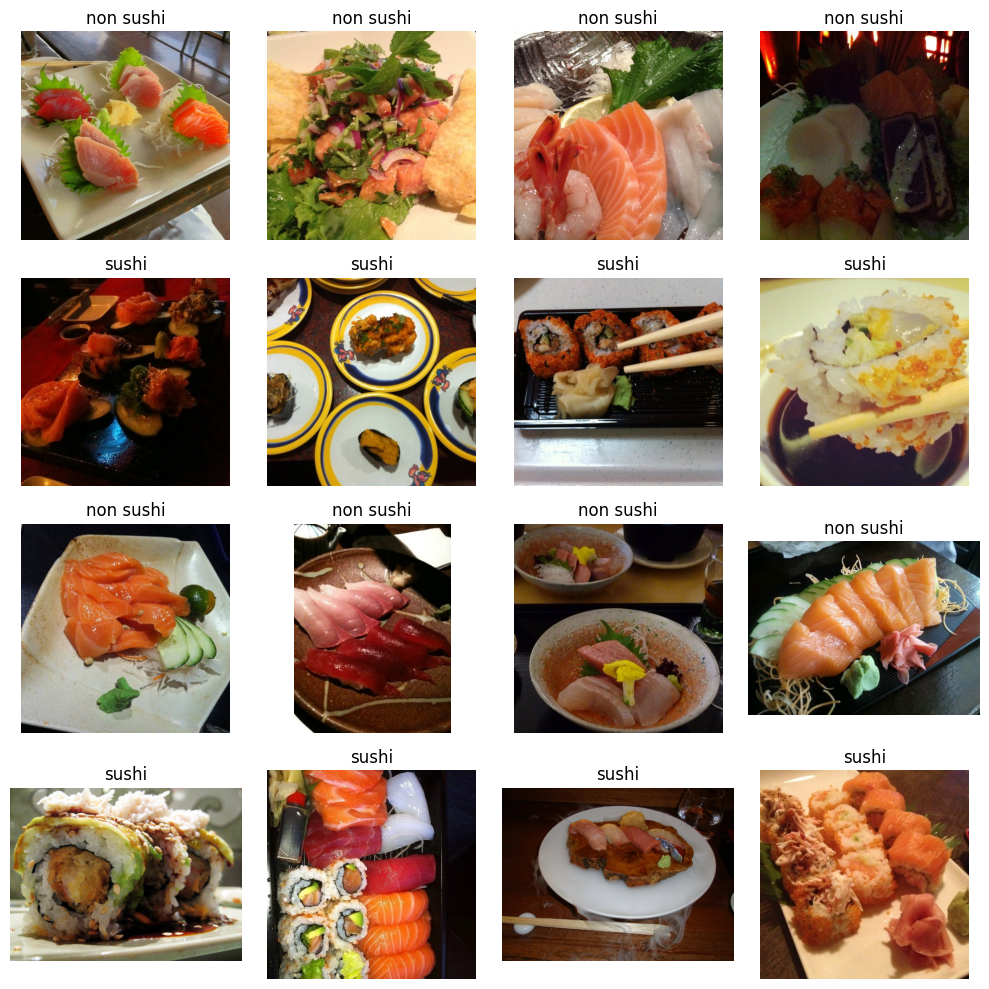

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Tentukan path ke direktori dataset
data_path = '/content/drive/MyDrive/food baru'

# Tentukan jumlah gambar yang akan ditampilkan
num_images = 16

# Buat figure dan axes
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

image_index = 0  # Inisialisasi indeks gambar

# Iterasi melalui folder train dan valid
for folder in ['train', 'valid']:
    # Iterasi melalui folder kelas (non sushi, sushi)
    for class_name in ['non sushi', 'sushi']:
        # Dapatkan path ke folder kelas
        class_path = os.path.join(data_path, folder, class_name)

        # Dapatkan daftar file gambar di folder kelas
        image_files = os.listdir(class_path)

        # Gunakan semua gambar jika jumlahnya kurang dari 4,
        # jika tidak, ambil 4 gambar secara acak
        num_images_to_display = min(len(image_files), num_images // 4)

        if num_images_to_display < num_images // 4:
            selected_images = image_files  # Gunakan semua gambar
        else:
            selected_images = np.random.choice(image_files, num_images_to_display, replace=False)


        # Tampilkan gambar beserta labelnya
        for i, image_file in enumerate(selected_images):
            if image_index < num_images:  # Batasi jumlah gambar yang ditampilkan
                # Baca gambar
                image = plt.imread(os.path.join(class_path, image_file))

                # Tampilkan gambar di axes
                axes[image_index].imshow(image)
                axes[image_index].axis('off')

                # Set judul axes sebagai label kelas
                axes[image_index].set_title(class_name)

                image_index += 1
            else:
                break  # Keluar dari loop jika sudah menampilkan 16 gambar

plt.tight_layout()
plt.show()

imagedata ImageDataGenerator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan path ke direktori dataset
data_path = '/content/drive/MyDrive/food baru'

# Buat ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Buat data generator untuk train, validation, dan test
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, 'train'),  # Path ke folder 'train'
    target_size=(150, 150),  # Ukuran gambar yang diinginkan
    batch_size=32,
    class_mode='binary'  # Karena hanya ada 2 kelas
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(data_path, 'valid'),  # Path ke folder 'valid'
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_path, 'test'),  # Path ke folder 'test'
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2002 images belonging to 2 classes.
Found 2010 images belonging to 2 classes.
Found 2010 images belonging to 2 classes.


##bangun model

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Gunakan Input layer sebagai layer pertama
    layers.Conv2D(32, (3, 3), activation='relu'),  # Hapus input_shape di sini
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
62/62 - 687s - 11s/step - accuracy: 0.6259 - loss: 0.6969 - val_accuracy: 0.7258 - val_loss: 0.5772
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 - 38s - 618ms/step - accuracy: 0.5000 - loss: 0.6922 - val_accuracy: 0.7298 - val_loss: 0.5862
Epoch 3/30
62/62 - 202s - 3s/step - accuracy: 0.7173 - loss: 0.5649 - val_accuracy: 0.7324 - val_loss: 0.5287
Epoch 4/30
62/62 - 42s - 671ms/step - accuracy: 0.8125 - loss: 0.4652 - val_accuracy: 0.7349 - val_loss: 0.5238
Epoch 5/30
62/62 - 152s - 2s/step - accuracy: 0.7056 - loss: 0.5624 - val_accuracy: 0.7434 - val_loss: 0.5617
Epoch 6/30
62/62 - 42s - 670ms/step - accuracy: 0.7188 - loss: 0.6005 - val_accuracy: 0.7440 - val_loss: 0.5612
Epoch 7/30
62/62 - 149s - 2s/step - accuracy: 0.7442 - loss: 0.5239 - val_accuracy: 0.7686 - val_loss: 0.4827
Epoch 8/30
62/62 - 41s - 657ms/step - accuracy: 0.7500 - loss: 0.5401 - val_accuracy: 0.7651 - val_loss: 0.4887
Epoch 9/30
62/62 - 202s - 3s/step - accuracy: 0.7726 - loss: 0.4946 - val_accuracy: 0.7848 - val_loss: 0.4546
Epoch 10/30
62/62 - 41s - 663ms/step - accuracy: 0.7812 - loss: 0.4450 - val_accuracy: 0.7853 - val_loss: 0.4550
Epoch 11/3

In [18]:
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

63/63 - 37s - 593ms/step - accuracy: 0.8900 - loss: 0.2661
Test Loss: 0.2661
Test Accuracy: 0.8900


In [19]:
model.save('model_klasifikasi_makanan.h5')

print("Model telah disimpan sebagai model_klasifikasi_makanan.h5")

Model telah disimpan sebagai model_klasifikasi_makanan.h5


In [20]:
from google.colab import files

files.download('model_klasifikasi_makanan.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

In [22]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """Plots the loss curves for training and validation data."""
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

def plot_accuracy_curves(history):
  """Plots the accuracy curves for training and validation data."""
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(accuracy))

  plt.plot(epochs, accuracy, 'r', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

In [23]:
predictions = model.predict(validation_generator)

63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 532ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


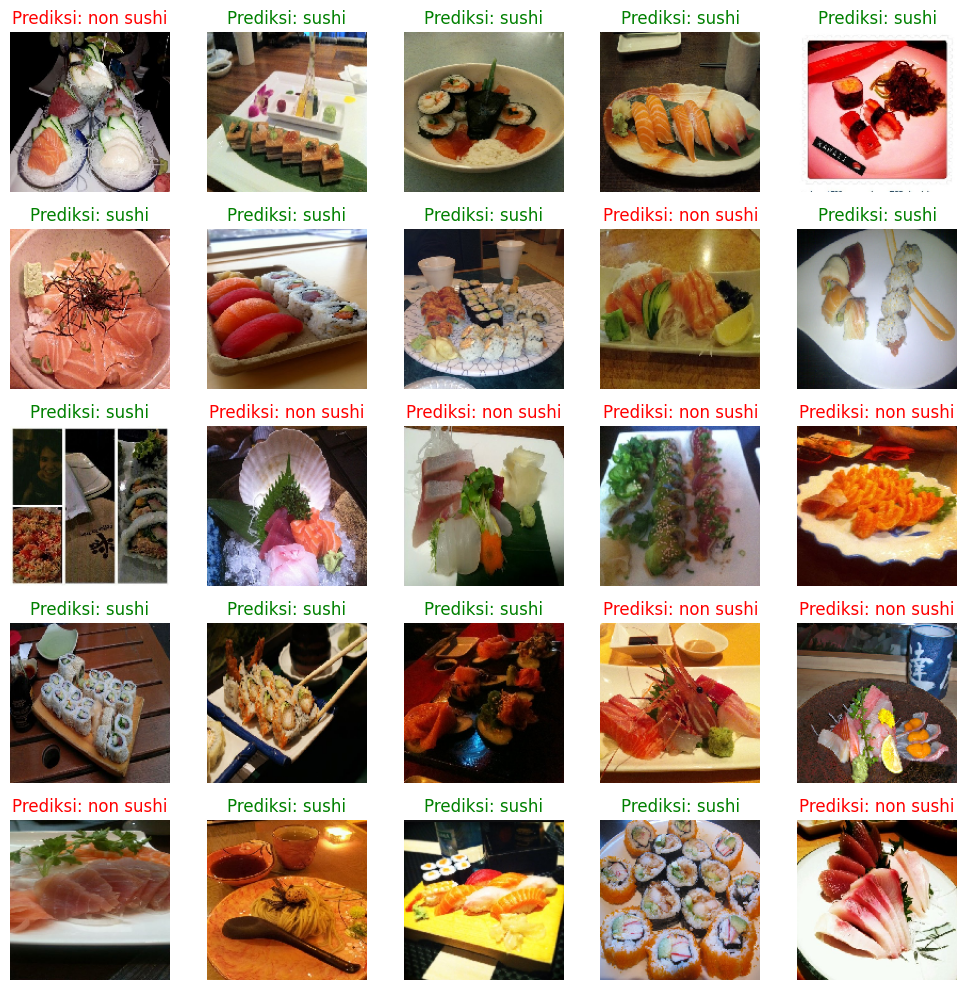

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil 25 gambar acak dari validation_generator
image_batch, label_batch = next(iter(validation_generator))
image_batch, label_batch = image_batch[:25], label_batch[:25]

# Lakukan prediksi
predictions = model.predict(image_batch)
predicted_labels = (predictions > 0.5).astype(int)  # Ubah prediksi menjadi 0 atau 1

# Tampilkan gambar dan label
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image_batch[i])

    # Tentukan warna teks label
    if predicted_labels[i][0] == 1:  # Jika prediksi adalah sushi (1)
        predicted_class_name = 'sushi'  # Tetapkan nama kelas sebagai sushi
        color = 'green'  # Warna hijau untuk sushi
    else:
        predicted_class_name = 'non sushi'  # Tetapkan nama kelas sebagai non sushi
        color = 'red'  # Warna merah untuk non sushi

    # Tampilkan judul dengan nama kelas yang diprediksi dan warna yang sesuai
    plt.title(f"Prediksi: {predicted_class_name}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [25]:
# Pastikan y_test dan pred telah didefinisikan
y_test = validation_generator.classes
predictions = model.predict(validation_generator)
pred = (predictions > 0.5).astype(int) # Gunakan threshold 0.5 untuk klasifikasi biner

# Tampilkan classification_report dengan zero_division=0 untuk menghindari warning
report = classification_report(y_test, pred, output_dict=True, zero_division=0)


63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step


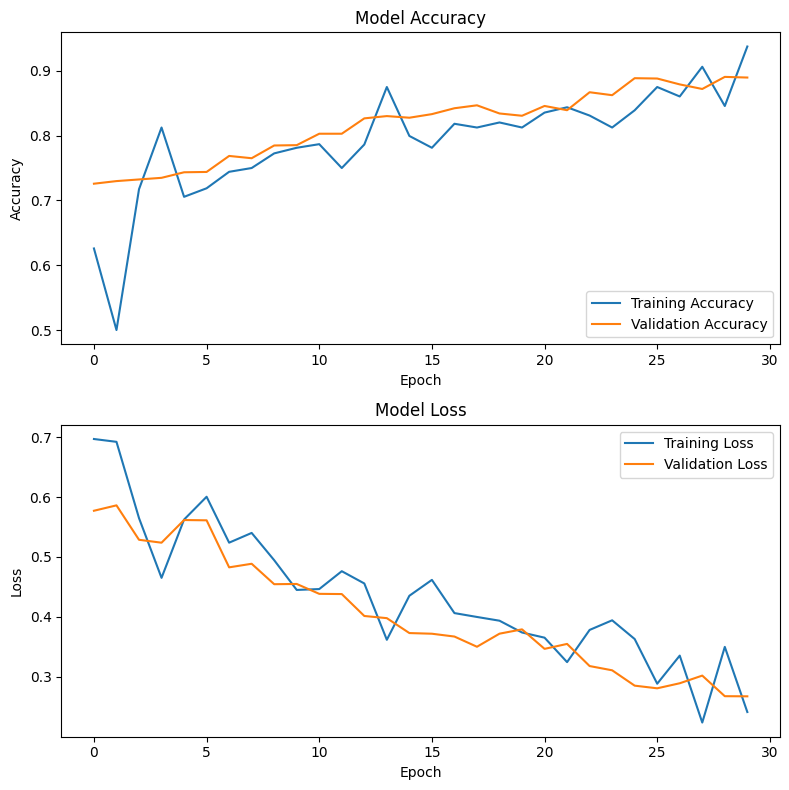

In [26]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    """
    Plots the accuracy and loss curves for training and validation data.

    Args:
        history: A Keras History object containing the training and validation metrics.
    """

    fig, axs = plt.subplots(2, 1, figsize=(8, 8))  # Buat 2 subplot (1 untuk akurasi, 1 untuk loss)

    # Plot Akurasi
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(loc='lower right')

    # Plot Loss
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='upper right')

    plt.tight_layout()  # Sesuaikan layout agar plot terlihat rapi
    plt.show()

# Panggil fungsi untuk membuat plot
plot_accuracy_and_loss(history)  # Ganti 'history' dengan objek history model Anda

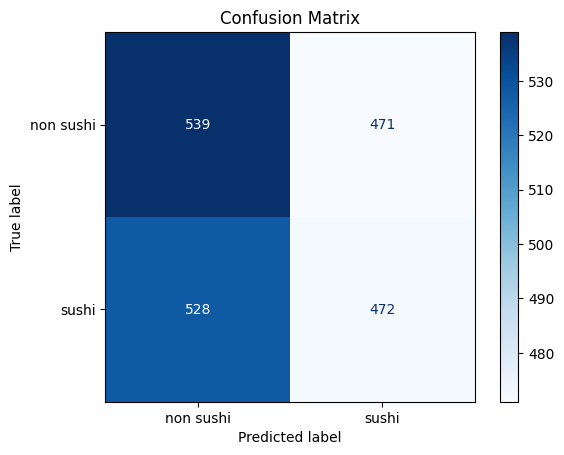

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (kode untuk melakukan prediksi dan mendapatkan y_test dan pred) ...

# Buat confusion matrix
cm = confusion_matrix(y_test, pred)

# Tampilkan confusion matrix menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non sushi', 'sushi']) # Ganti label kelas jika perlu
disp.plot(cmap=plt.cm.Blues) # Pilih colormap yang diinginkan
plt.title('Confusion Matrix')
plt.show()

In [28]:
import tensorflow as tf

def create_cnn_model(input_shape, num_classes):


    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Ganti activation jika perlu
    ])

    return model

In [29]:
import tensorflow as tf

def create_cnn_model(input_shape, num_classes):

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Ganti activation jika perlu
    ])

    return model

# Contoh penggunaan
input_shape = (150, 150, 3)  # Ganti sesuai dengan ukuran gambar Anda
num_classes = 2  # Ganti sesuai dengan jumlah kelas di dataset Anda
model = create_cnn_model(input_shape, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Compile the model
model.compile(loss='categorical_crossentropy',  # Ganti sesuai kebutuhan
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image
import os

# Fungsi untuk membuat DataFrame dari dataset gambar
def create_image_dataframe(data_dir):
    image_paths = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        img = Image.open(image_path)
                        img.verify()
                        image_paths.append(image_path)
                        labels.append(class_name)
                    except (IOError, SyntaxError) as e:
                        print(f"Error membaca gambar {image_path}: {e}")

    df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})
    return df

# Fungsi untuk membuat model CNN
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [32]:
import os
import pandas as pd
from PIL import Image

def create_image_dataframe(data_dir):
    image_paths = []
    labels = []

    for folder in ['train', 'valid', 'test']:
        folder_path = os.path.join(data_dir, folder)
        for class_name in os.listdir(folder_path):
            class_dir = os.path.join(folder_path, class_name)
            if os.path.isdir(class_dir):
                for image_name in os.listdir(class_dir):
                    image_path = os.path.join(class_dir, image_name)
                    if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        try:
                            img = Image.open(image_path)
                            img.verify()
                            image_paths.append(image_path)

                            # Menyesuaikan label agar konsisten
                            if class_name == "nonsushi":
                                labels.append("non sushi") # Mengubah 'nonsushi' menjadi 'non sushi'
                            else:
                                labels.append(class_name)

                        except (IOError, SyntaxError) as e:
                            print(f"Error membaca gambar {image_path}: {e}")

    df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})
    return df

In [33]:
# Parameter model
input_shape = (150, 150, 3)
num_classes = 2  # Jumlah kelas (sushi dan non sushi)

# Buat model CNN
model = create_cnn_model(input_shape, num_classes)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Pastikan data_path didefinisikan sebelum digunakan
data_path = '/content/drive/MyDrive/food baru'

# Buat DataFrame
df = create_image_dataframe(data_path)  # Gunakan data_path di sini
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# Bagi data menjadi train dan test

train_df = pd.get_dummies(train_df, columns=['Label'])
test_df = pd.get_dummies(test_df, columns=['Label'])

# Buat data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image_Path",
    y_col=train_df.columns[1:], # Ambil semua kolom label setelah one-hot encoding
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw" # Gunakan 'raw' karena label sudah one-hot encoded
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="Image_Path",
    y_col=test_df.columns[1:], # Ambil semua kolom label setelah one-hot encoding
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw" # Gunakan 'raw' karena label sudah one-hot encoded
)

Found 4817 validated image filenames.
Found 1205 validated image filenames.


In [35]:
# Latih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,  # Ganti sesuai kebutuhan
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluasi model
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.6247 - loss: 0.8038 - val_accuracy: 0.7424 - val_loss: 0.5250
Epoch 2/15
  1/150 ━━━━━━━━━━━━━━━━━━━━ 3:36 1s/step - accuracy: 0.7500 - loss: 0.4907

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.7500 - loss: 0.4907 - val_accuracy: 0.7373 - val_loss: 0.5276
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.7355 - loss: 0.5332 - val_accuracy: 0.7356 - val_loss: 0.5906
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 249ms/step - accuracy: 0.8125 - loss: 0.4350 - val_accuracy: 0.7508 - val_loss: 0.5424
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.7531 - loss: 0.5041 - val_accuracy: 0.8159 - val_loss: 0.4407
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.7812 - loss: 0.5560 - val_accuracy: 0.8083 - val_loss: 0.4493
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8056 - loss: 0.4230 - val_accuracy: 0.8235 - val_loss: 0.4115
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 261ms/step - accuracy: 0.9062 - loss: 0.2434 - val_accuracy: 0.8066 - val_loss: 0.4274
Epoch 9/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8237 - loss: 0.3871 - val_accurac

### Menyimpan Model

In [36]:
# Simpan model dalam format SavedModel
model.export("model_klasifikasi_makanan")  # Gunakan model.export()

print("Model telah disimpan dalam format SavedModel di direktori 'model_klasifikasi_makanan'.")

Saved artifact at 'model_klasifikasi_makanan'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_23')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136025562522896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562527696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562528080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562526160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562527888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562529232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562528656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562527504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562523472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136025562527120: TensorSpec(shape=(), dtype=tf.resource, name=None)
Mode

In [38]:
# Konversi model ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("model_klasifikasi_makanan")
tflite_model = converter.convert()

# Simpan model TFLite
with open('model_klasifikasi_makanan.tflite', 'wb') as f:
  f.write(tflite_model)

print("Model telah disimpan dalam format TF-Lite di file 'model_klasifikasi_makanan.tflite'.")

Model telah disimpan dalam format TF-Lite di file 'model_klasifikasi_makanan.tflite'.


In [39]:
from google.colab import files

files.download('model_klasifikasi_makanan.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
!pip uninstall packaging -y

Found existing installation: packaging 24.2
Uninstalling packaging-24.2:
  Successfully uninstalled packaging-24.2


In [42]:
!pip install tensorflowjs

In [44]:
import tensorflowjs as tfjs

# Simpan model dalam format TFJS
tfjs.converters.save_keras_model(model, "model_klasifikasi_makanan_tfjs")

print("Model telah disimpan dalam format TFJS di direktori 'model_klasifikasi_makanan_tfjs'.")

failed to lookup keras version from the file,
    this is likely a weight only file
Model telah disimpan dalam format TFJS di direktori 'model_klasifikasi_makanan_tfjs'.


In [45]:
!zip -r model_klasifikasi_makanan_tfjs.zip model_klasifikasi_makanan_tfjs/

  adding: model_klasifikasi_makanan_tfjs/ (stored 0%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard2of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard9of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard14of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard17of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard11of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard12of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard5of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard6of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard15of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard10of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard4of19.bin (deflated 7%)
  adding: model_klasifikasi_makanan_tfjs/group1-shard3of19.bin (deflated 7%)
  adding: model_

In [46]:
from google.colab import files

files.download('model_klasifikasi_makanan_tfjs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import tensorflow as tf

# Simpan model dalam format .pb
tf.saved_model.save(model, "model_klasifikasi_makanan_pb")

print("Model telah disimpan dalam format .pb di direktori 'model_klasifikasi_makanan_pb'.")

Model telah disimpan dalam format .pb di direktori 'model_klasifikasi_makanan_pb'.


In [48]:
!zip -r model_klasifikasi_makanan_pb.zip model_klasifikasi_makanan_pb/

  adding: model_klasifikasi_makanan_pb/ (stored 0%)
  adding: model_klasifikasi_makanan_pb/fingerprint.pb (stored 0%)
  adding: model_klasifikasi_makanan_pb/assets/ (stored 0%)
  adding: model_klasifikasi_makanan_pb/saved_model.pb (deflated 87%)
  adding: model_klasifikasi_makanan_pb/variables/ (stored 0%)
  adding: model_klasifikasi_makanan_pb/variables/variables.index (deflated 62%)
  adding: model_klasifikasi_makanan_pb/variables/variables.data-00000-of-00001 (deflated 14%)


In [49]:
from google.colab import files

files.download('model_klasifikasi_makanan_pb.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>